In [ ]:
# Librerías
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Datos
Una posible opción para un ejemplo de aplicación son los datos del club de Karate de Zachary. Es un grafo de 34 nodos y 78 aristas donde cada conexión representa un enlace entre participantes del club.

In [ ]:
G = nx.karate_club_graph()
print(G)

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


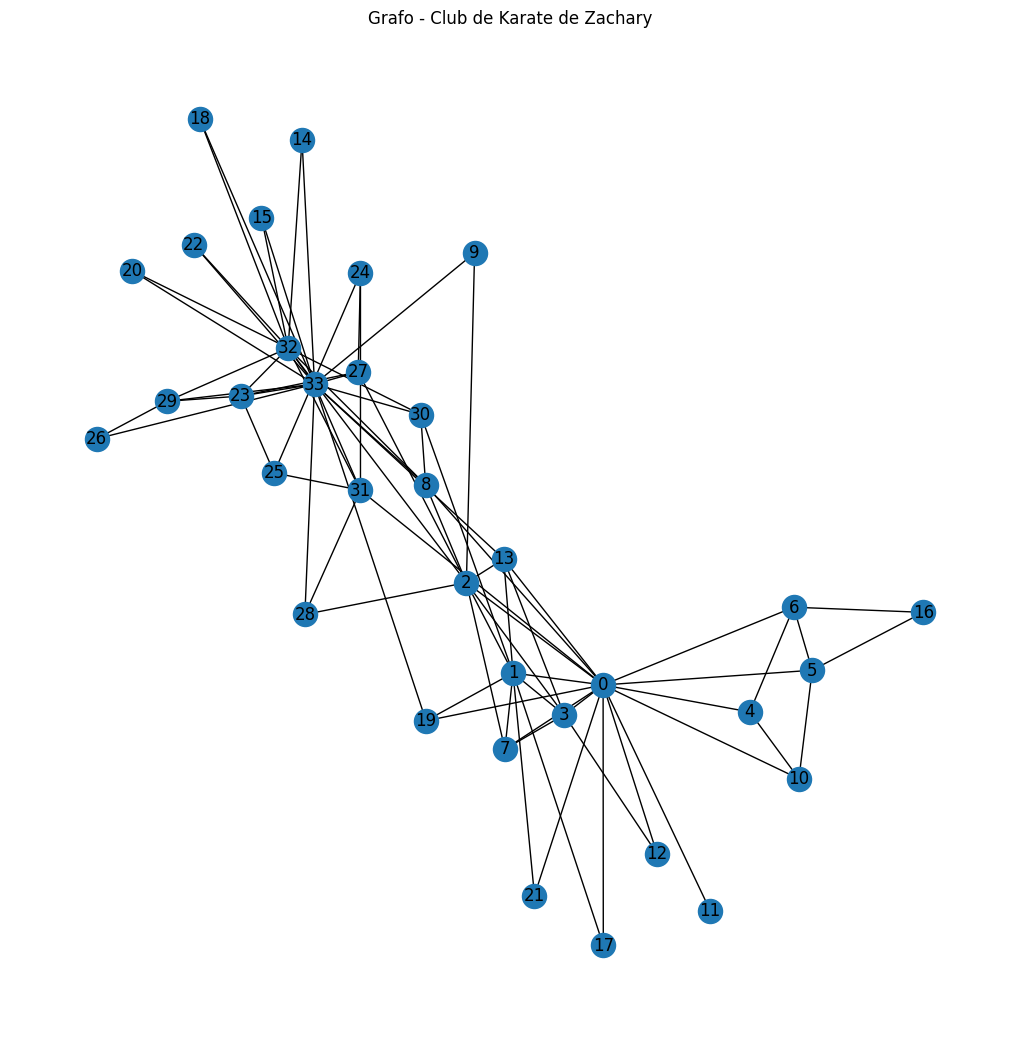

In [ ]:
plt.figure(figsize=(10,10))
nx.draw(G, with_labels = True)
#nx.draw_networkx_edge_labels(G, pos=nx.circular_layout(G), edge_labels=nx.get_edge_attributes(G, "weight"))
plt.title("Grafo - Club de Karate de Zachary")
plt.show()

In [ ]:
# Función para calcular vector de RF para el nodo y aproximar K

def vector_rf(W, d, f_vec, p_h, node, random_walks, h = 45):
  # Inicializamos
  n = h
  phi = np.zeros(len(d))
  m = random_walks
  f_m = f_vec(n)

  for w in range(m):
    # Inicializamos para la caminata aleatoria
    load = 1
    current_node = node
    terminated = False
    walk_lenght = 0
    register = [current_node]
    #print(phi[current_node])
    while terminated == False:
      # Para el caso en el que la caminata aleatoria supere el default
      if walk_lenght == n:
        #print("Requerí mas valores de f")
        n = 2 * n
        f_m = f_vec(n)
        #print(len(f_m))

      # Actualizamos la entrada y el número de la caminata aleatoria
      phi[current_node] += load * f_m[walk_lenght]
      #if walk_lenght == 3:
       # print(load * f_m[walk_lenght], phi[current_node])
      #print(phi)
      walk_lenght += 1

      # Determinamos el vecino aleatorio
      #print(current_node)
      neighbors = np.nonzero(W[current_node])[0]
      new_node = np.random.choice(neighbors)
      aux = []
      while new_node in register:
        aux.append(new_node)
        new_node = np.random.choice(neighbors)
        if len(aux) == len(neighbors):
          break
      if len(aux) == len(neighbors):
        new_node = np.random.choice(neighbors)

      # Actualizamos el peso de las contribuciones
      load = load * (d[current_node] / (1 - p_h))* W[current_node][new_node]
      #print(d[current_node] / (1 - p_h))
      #print(new_node)

      # Actualizamos nodos
      current_node = new_node

      register.append(current_node)

      # Verificamos si se detiene la caminata
      terminated = (np.random.uniform(0,0.5) < p_h)
    #print(phi[node])

    #print(phi / m)
  return phi / m

In [ ]:
W = nx.adjacency_matrix(G)
W = W.todense()
for i in range(nx.number_of_nodes(G)):
  print(W[i])

[0 4 5 3 3 3 3 2 2 0 2 3 1 3 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 2 0 0]
[4 0 6 3 0 0 0 4 0 0 0 0 0 5 0 0 0 1 0 2 0 2 0 0 0 0 0 0 0 0 2 0 0 0]
[5 6 0 3 0 0 0 4 5 1 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 2 0]
[3 3 3 0 0 0 0 3 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[3 0 0 0 0 0 2 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[3 0 0 0 0 0 5 0 0 0 3 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[3 0 0 0 2 5 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[2 4 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[2 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 4]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
[2 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[3 5 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
[0 0 0 0 0 0 0 0 0 0

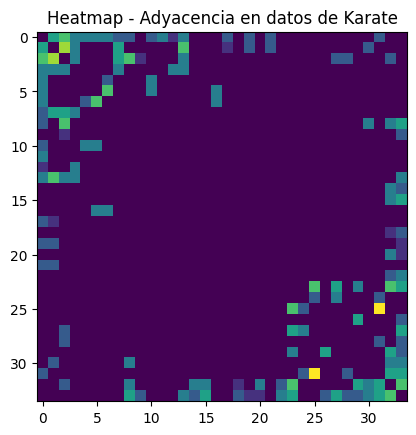

In [ ]:
plt.imshow(W)
plt.title("Heatmap - Adyacencia en datos de Karate")
plt.show()

In [ ]:
degrees = G.degree()
l = nx.number_of_nodes(G)
d = np.zeros(l)
for i in range(l):
  d[i] = degrees[i]
print(d)

[16.  9. 10.  6.  3.  4.  4.  4.  5.  2.  3.  1.  2.  5.  2.  2.  2.  2.
  2.  3.  2.  2.  2.  5.  3.  3.  2.  4.  3.  4.  4.  6. 12. 17.]


In [ ]:
# Función para calcular f según (6)

def compute_f_vector(f_alpha, n):
  alpha = f_alpha(n)
  f = np.zeros(n)
  # Inicialización de f(0)
  f[0] = np.sqrt(alpha[0])
  aux = 2 * f[0]
  # Calculamos un par más por seguridad
  f[1] = alpha[1] / aux

  f[2] = (alpha[2] - f[1]**2) / aux

  # Cálculo de f(i) para i >= 3
  for i in range(3, n):
      suma = sum(f[i-p] * f[p] for p in range(1, i))
      f[i] = (alpha[i] - suma) / aux

  return f


In [ ]:
# Función para calcular alpha para un kernel laplaciano

def alpha_laplace(d, s, n):
  alpha = np.ones(n)
  aux1 = 0
  aux2 = 1
  # Definimos el cociente que se va a estar usando
  q = 1 / (1 + s**(-2))
  #q = 1

  for i in range(1, n):
    alpha[i] = ((d + aux1) / aux2) * q * alpha[i-1]
    aux1 += 1
    aux2 += 1

  return alpha

In [ ]:
# función para calcular la matriz de kernel con grf

def kernel_graph_random_features(W, d, f_vec, p_h, random_walks):
  # Definimos las matriz para llenarla
  K1 = np.zeros(W.shape)

  # Iteramos para llenar esas matrices con los vectores de caracteristicas
  for i in range(len(d)):
    # Para la primer matriz
    phi1 = vector_rf(W, d, f_vec, p_h, i, random_walks)
    for j in range(len(d)):
      K1[i][j] = phi1[j]

  # Calculamos la estimación
  K = K1 @ K1.T

  return K

In [ ]:
# Ahora una función para calcular la matríz de Kernel de manera "Normal"

def d_regularized_laplacian_graph_kernel(W, d, s):
  # Primero hay que calcular W_hat
  dim = W.shape[0]
  degree = np.sum(W, axis=0)
  #print(degree)
  #print(' ')

  D_inv_sqrt = np.diag(1.0 / np.sqrt(degree))
  W_hat = D_inv_sqrt @ W @ D_inv_sqrt
  #print(W_hat)
  #print(' ')
  # Ahora calculamos L
  L = np.identity(dim) - W_hat
  #print(L)

  # Finalmente, calculamos K
  K = np.linalg.matrix_power(np.linalg.inv(np.identity(dim) + (s**2)*L), d)
  #print(' ')
  #print(K)
  return K

In [ ]:
def compute_W_hat(W):
  dim = W.shape[0]
  degree = np.sum(W, axis = 0)

  D = np.diag(1.0 / np.sqrt(degree))

  W_hat = D @ W @ D

  return W_hat

In [ ]:
# Función para calcular la norma relativa de Frobenius

def frobenius(A):
  sum = 0
  for i in range(A.shape[0]):
    for j in range(A.shape[1]):
      sum += A[i][j]**2
  return np.sqrt(sum)

def relative_frobenius(K, K_approx):
  aux1 = frobenius(K - K_approx)
  aux2 = frobenius(K)
  return aux1/aux2

Medidas de diferencia de aproximación para el 1-regularized Laplacian kernel


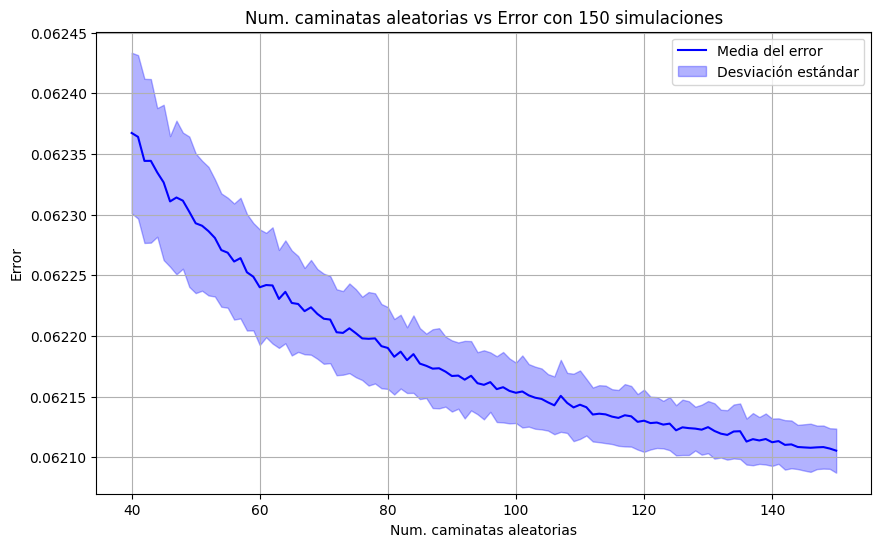

In [ ]:
r_walks = [j for j in range(40, 151)]
regularizer = 0.25
num_simulations = 150

# Almacenaremos los errores de todas las simulaciones
all_errors = np.zeros((num_simulations, len(r_walks)))

K_real = d_regularized_laplacian_graph_kernel(W, 1, regularizer)
W_hat = compute_W_hat(W)
print("Medidas de diferencia de aproximación para el 1-regularized Laplacian kernel")

f = lambda n: compute_f_vector(lambda n: alpha_laplace(1, regularizer, n), n)

# Realizamos 150 simulaciones
for sim in range(num_simulations):
    error = []
    for idx, m in enumerate(r_walks):
        K_approx = kernel_graph_random_features(W_hat, d, f, 0.1, m)
        e = relative_frobenius(K_real, K_approx)
        error.append(e)
    all_errors[sim, :] = error

# Calculamos la media y la desviación estándar de los errores
mean_error = np.mean(all_errors, axis=0)
std_error = np.std(all_errors, axis=0)

# Graficamos
plt.figure(figsize=(10, 6))
plt.plot(r_walks, mean_error, label='Media del error', color='blue')
plt.fill_between(r_walks, mean_error - std_error, mean_error + std_error, color='blue', alpha=0.3, label='Desviación estándar')

plt.ylabel('Error')
plt.xlabel('Num. caminatas aleatorias')
plt.title('Num. caminatas aleatorias vs Error con 150 simulaciones')
plt.grid(True)
plt.legend()
plt.show()

Medidas de diferencia de aproximación para el 2-regularized Laplacian kernel


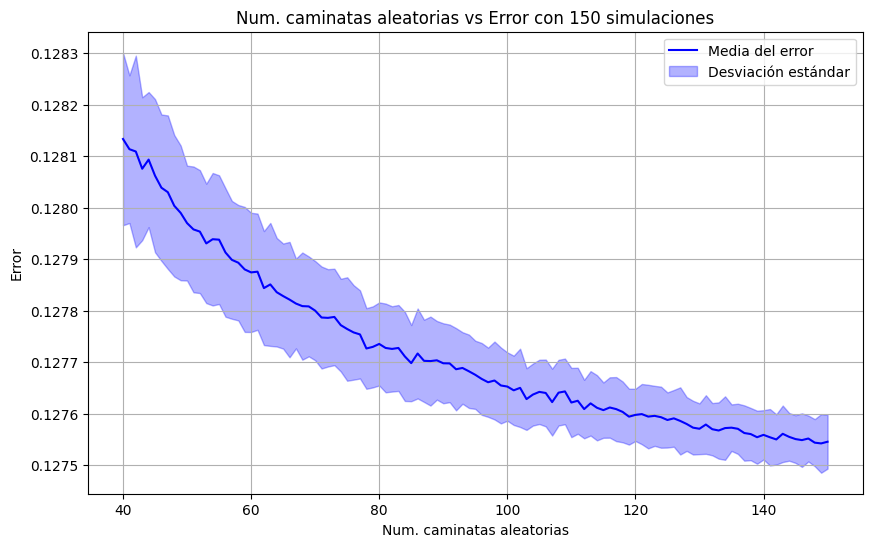

In [ ]:
r_walks = [j for j in range(40, 151)]
regularizer = 0.25
num_simulations = 150

# Almacenaremos los errores de todas las simulaciones
all_errors = np.zeros((num_simulations, len(r_walks)))

K_real = d_regularized_laplacian_graph_kernel(W, 2, regularizer)
W_hat = compute_W_hat(W)
print("Medidas de diferencia de aproximación para el 2-regularized Laplacian kernel")

f = lambda n: compute_f_vector(lambda n: alpha_laplace(2, regularizer, n), n)

# Realizamos 150 simulaciones
for sim in range(num_simulations):
    error = []
    for idx, m in enumerate(r_walks):
        K_approx = kernel_graph_random_features(W_hat, d, f, 0.1, m)
        e = relative_frobenius(K_real, K_approx)
        error.append(e)
    all_errors[sim, :] = error

# Calculamos la media y la desviación estándar de los errores
mean_error = np.mean(all_errors, axis=0)
std_error = np.std(all_errors, axis=0)

# Graficamos
plt.figure(figsize=(10, 6))
plt.plot(r_walks, mean_error, label='Media del error', color='blue')
plt.fill_between(r_walks, mean_error - std_error, mean_error + std_error, color='blue', alpha=0.3, label='Desviación estándar')

plt.ylabel('Error')
plt.xlabel('Num. caminatas aleatorias')
plt.title('Num. caminatas aleatorias vs Error con 150 simulaciones')
plt.grid(True)
plt.legend()
plt.show()

Medidas de diferencia de aproximación para el 1-regularized Laplacian kernel


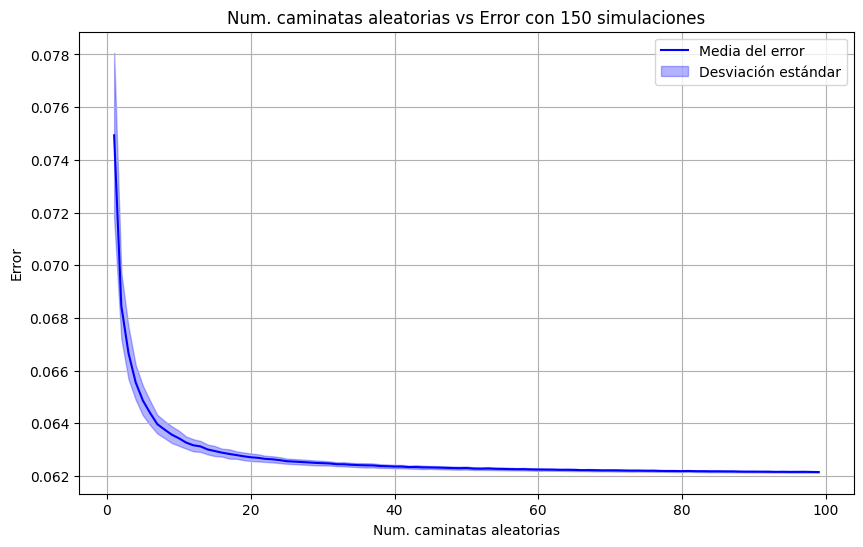

In [ ]:
r_walks = [j for j in range(1, 100)]
regularizer = 0.25
num_simulations = 150

# Almacenaremos los errores de todas las simulaciones
all_errors = np.zeros((num_simulations, len(r_walks)))

K_real = d_regularized_laplacian_graph_kernel(W, 1, regularizer)
W_hat = compute_W_hat(W)
print("Medidas de diferencia de aproximación para el 1-regularized Laplacian kernel")

f = lambda n: compute_f_vector(lambda n: alpha_laplace(1, regularizer, n), n)

# Realizamos 150 simulaciones
for sim in range(num_simulations):
    error = []
    for idx, m in enumerate(r_walks):
        K_approx = kernel_graph_random_features(W_hat, d, f, 0.1, m)
        e = relative_frobenius(K_real, K_approx)
        error.append(e)
    all_errors[sim, :] = error

# Calculamos la media y la desviación estándar de los errores
mean_error = np.mean(all_errors, axis=0)
std_error = np.std(all_errors, axis=0)

# Graficamos
plt.figure(figsize=(10, 6))
plt.plot(r_walks, mean_error, label='Media del error', color='blue')
plt.fill_between(r_walks, mean_error - std_error, mean_error + std_error, color='blue', alpha=0.3, label='Desviación estándar')

plt.ylabel('Error')
plt.xlabel('Num. caminatas aleatorias')
plt.title('Num. caminatas aleatorias vs Error con 150 simulaciones')
plt.grid(True)
plt.legend()
plt.show()

Medidas de diferencia de aproximación para el 2-regularized Laplacian kernel


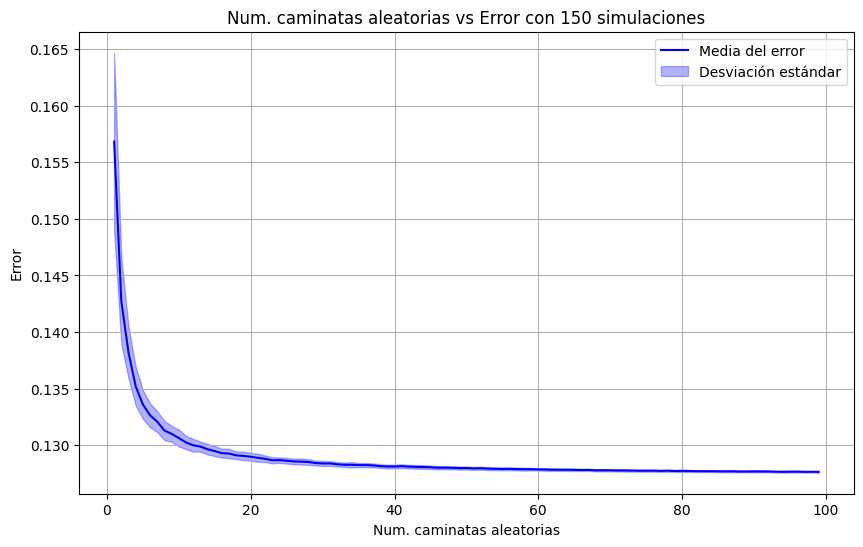

In [ ]:
r_walks = [j for j in range(1, 100)]
regularizer = 0.25
num_simulations = 150

# Almacenaremos los errores de todas las simulaciones
all_errors = np.zeros((num_simulations, len(r_walks)))

K_real = d_regularized_laplacian_graph_kernel(W, 2, regularizer)
W_hat = compute_W_hat(W)
print("Medidas de diferencia de aproximación para el 2-regularized Laplacian kernel")

f = lambda n: compute_f_vector(lambda n: alpha_laplace(2, regularizer, n), n)

# Realizamos 150 simulaciones
for sim in range(num_simulations):
    error = []
    for idx, m in enumerate(r_walks):
        K_approx = kernel_graph_random_features(W_hat, d, f, 0.1, m)
        e = relative_frobenius(K_real, K_approx)
        error.append(e)
    all_errors[sim, :] = error

# Calculamos la media y la desviación estándar de los errores
mean_error = np.mean(all_errors, axis=0)
std_error = np.std(all_errors, axis=0)

# Graficamos
plt.figure(figsize=(10, 6))
plt.plot(r_walks, mean_error, label='Media del error', color='blue')
plt.fill_between(r_walks, mean_error - std_error, mean_error + std_error, color='blue', alpha=0.3, label='Desviación estándar')

plt.ylabel('Error')
plt.xlabel('Num. caminatas aleatorias')
plt.title('Num. caminatas aleatorias vs Error con 150 simulaciones')
plt.grid(True)
plt.legend()
plt.show()